### Testing integration of multiple datasets

##### first just going to test integrating two datasets from different cancer types
eg. GSE217517 (HGSOC) and GSE188737 (HNSCC)

``` bash
rsync -azvhp /QRISdata/Q5935/nikita/scdata/MYELOID_CELLS/ /scratch/user/s4436039/scdata/Myeloid_Cells
```

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata"

In [2]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
OC <- readRDS(file = "/scratch/user/s4436039/scdata/Myeloid_Cells/GSE217517_myeloid.RDS")
HN <- readRDS(file = "/scratch/user/s4436039/scdata/Myeloid_Cells/GSE188737_myeloid.RDS")

In [25]:
table(OC$sample_type)


tumour 
  8457 

In [26]:
table(HN$sample_type)


       LN mets primary tumour 
          2093           2804 

In [7]:
#only want HN primary tumour for this test
HN2 <- subset(HN, subset = sample_type %in% c("primary tumour"))

In [27]:
Data <- merge(OC, y = HN2, project = "merged")

In [28]:
Data

An object of class Seurat 
41720 features across 11261 samples within 1 assay 
Active assay: RNA (41720 features, 2000 variable features)
 32 layers present: counts.1.GSE217517, counts.1.GSE188737, counts.2.GSE217517, counts.2.GSE188737, counts.3.GSE217517, counts.3.GSE188737, counts.4.GSE217517, counts.4.GSE188737, counts.5.GSE217517, counts.5.GSE188737, counts.6.GSE217517, counts.6.GSE188737, counts.7.GSE217517, counts.7.GSE188737, counts.8.GSE217517, data.1.GSE217517, data.2.GSE217517, data.3.GSE217517, data.4.GSE217517, data.5.GSE217517, data.6.GSE217517, data.7.GSE217517, data.8.GSE217517, scale.data.GSE217517, data.1.GSE188737, data.2.GSE188737, data.3.GSE188737, data.4.GSE188737, data.5.GSE188737, data.6.GSE188737, data.7.GSE188737, scale.data.GSE188737

perform standard workflow

In [11]:
#Normalise the data
#Data <- NormalizeData(Data)
#Find variable features
#Data <- FindVariableFeatures(Data, selection.method = "vst", nfeatures = 2000)
#Scale the data
#Data <- ScaleData(Data, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
#Data <- RunPCA(Data, features = VariableFeatures(object = Data))

Normalizing layer: counts.1.GSE217517

Normalizing layer: counts.1.GSE188737

Normalizing layer: counts.2.GSE217517

Normalizing layer: counts.2.GSE188737

Normalizing layer: counts.3.GSE217517

Normalizing layer: counts.3.GSE188737

Normalizing layer: counts.4.GSE217517

Normalizing layer: counts.4.GSE188737

Normalizing layer: counts.5.GSE217517

Normalizing layer: counts.5.GSE188737

Normalizing layer: counts.6.GSE217517

Normalizing layer: counts.6.GSE188737

Normalizing layer: counts.7.GSE217517

Normalizing layer: counts.7.GSE188737

Normalizing layer: counts.8.GSE217517

Finding variable features for layer counts.1.GSE217517

Finding variable features for layer counts.1.GSE188737

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  -1.9032”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.00028077”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, 

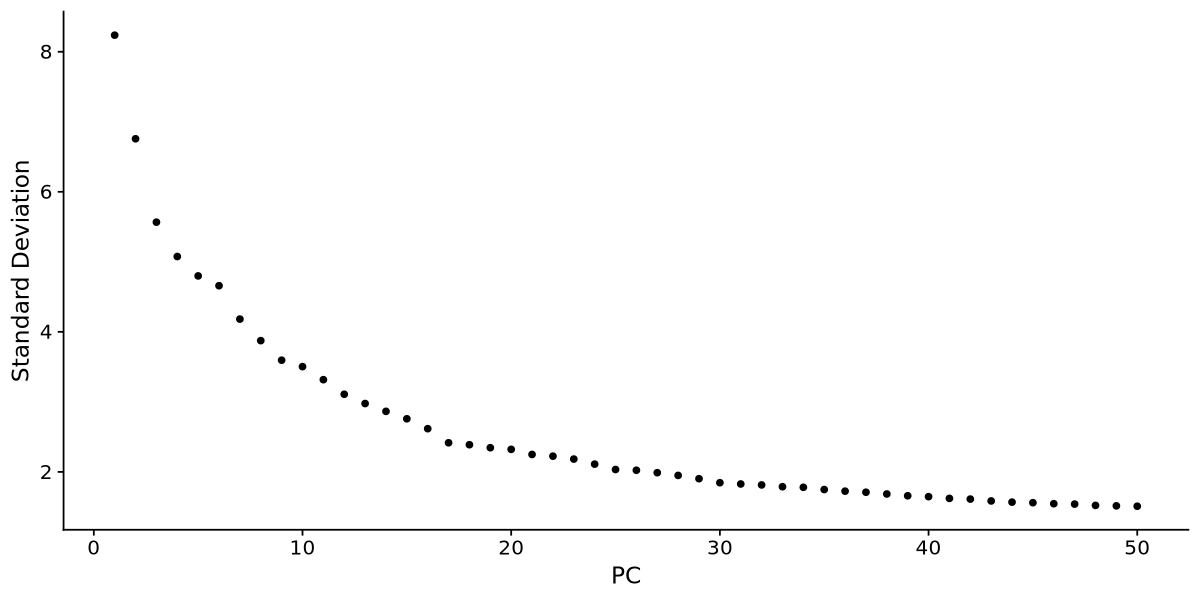

In [12]:
#make elbow plot
#options(repr.plot.height=5, repr.plot.width=10)
#ElbowPlot(Data, ndims=50)

In [29]:
Data <- NormalizeData(Data)
Data <- FindVariableFeatures(Data)
Data <- ScaleData(Data)
Data <- RunPCA(Data)

Normalizing layer: counts.1.GSE217517

Normalizing layer: counts.1.GSE188737

Normalizing layer: counts.2.GSE217517

Normalizing layer: counts.2.GSE188737

Normalizing layer: counts.3.GSE217517

Normalizing layer: counts.3.GSE188737

Normalizing layer: counts.4.GSE217517

Normalizing layer: counts.4.GSE188737

Normalizing layer: counts.5.GSE217517

Normalizing layer: counts.5.GSE188737

Normalizing layer: counts.6.GSE217517

Normalizing layer: counts.6.GSE188737

Normalizing layer: counts.7.GSE217517

Normalizing layer: counts.7.GSE188737

Normalizing layer: counts.8.GSE217517

Finding variable features for layer counts.1.GSE217517

Finding variable features for layer counts.1.GSE188737

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  -1.9032”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.00028077”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, 

In [31]:
Data <- FindNeighbors(Data, dims = 1:30, reduction = "pca")
Data <- FindClusters(Data, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11261
Number of edges: 389419

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8349
Number of communities: 34
Elapsed time: 1 seconds


In [14]:
#Find neighbours (make sure number matches no. features chosen above)
#Data <- FindNeighbors(Data, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



In [15]:
#Cluster, resolution here set to 0.2
#Data <- FindClusters(Data, resolution = 0.2, cluster.name = "unintegrated_clusters")

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11261
Number of edges: 401890

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9402
Number of communities: 12
Elapsed time: 1 seconds


In [16]:
#Run UMAP
#Data <- RunUMAP(Data, dims = 1:40, reduction = "pca", reduction.name = "umap.unintegrated")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:19:49 UMAP embedding parameters a = 0.9922 b = 1.112

11:19:49 Read 11261 rows and found 40 numeric columns

11:19:49 Using Annoy for neighbor search, n_neighbors = 30

11:19:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:19:50 Writing NN index file to temp file /scratch/temp/9871339/RtmpeOuPct/file4fbf11557e1ec

11:19:50 Searching Annoy index using 1 thread, search_k = 3000

11:19:52 Annoy recall = 100%

11:19:53 Commencing smooth kNN distance calibration using 1 thread
 with t

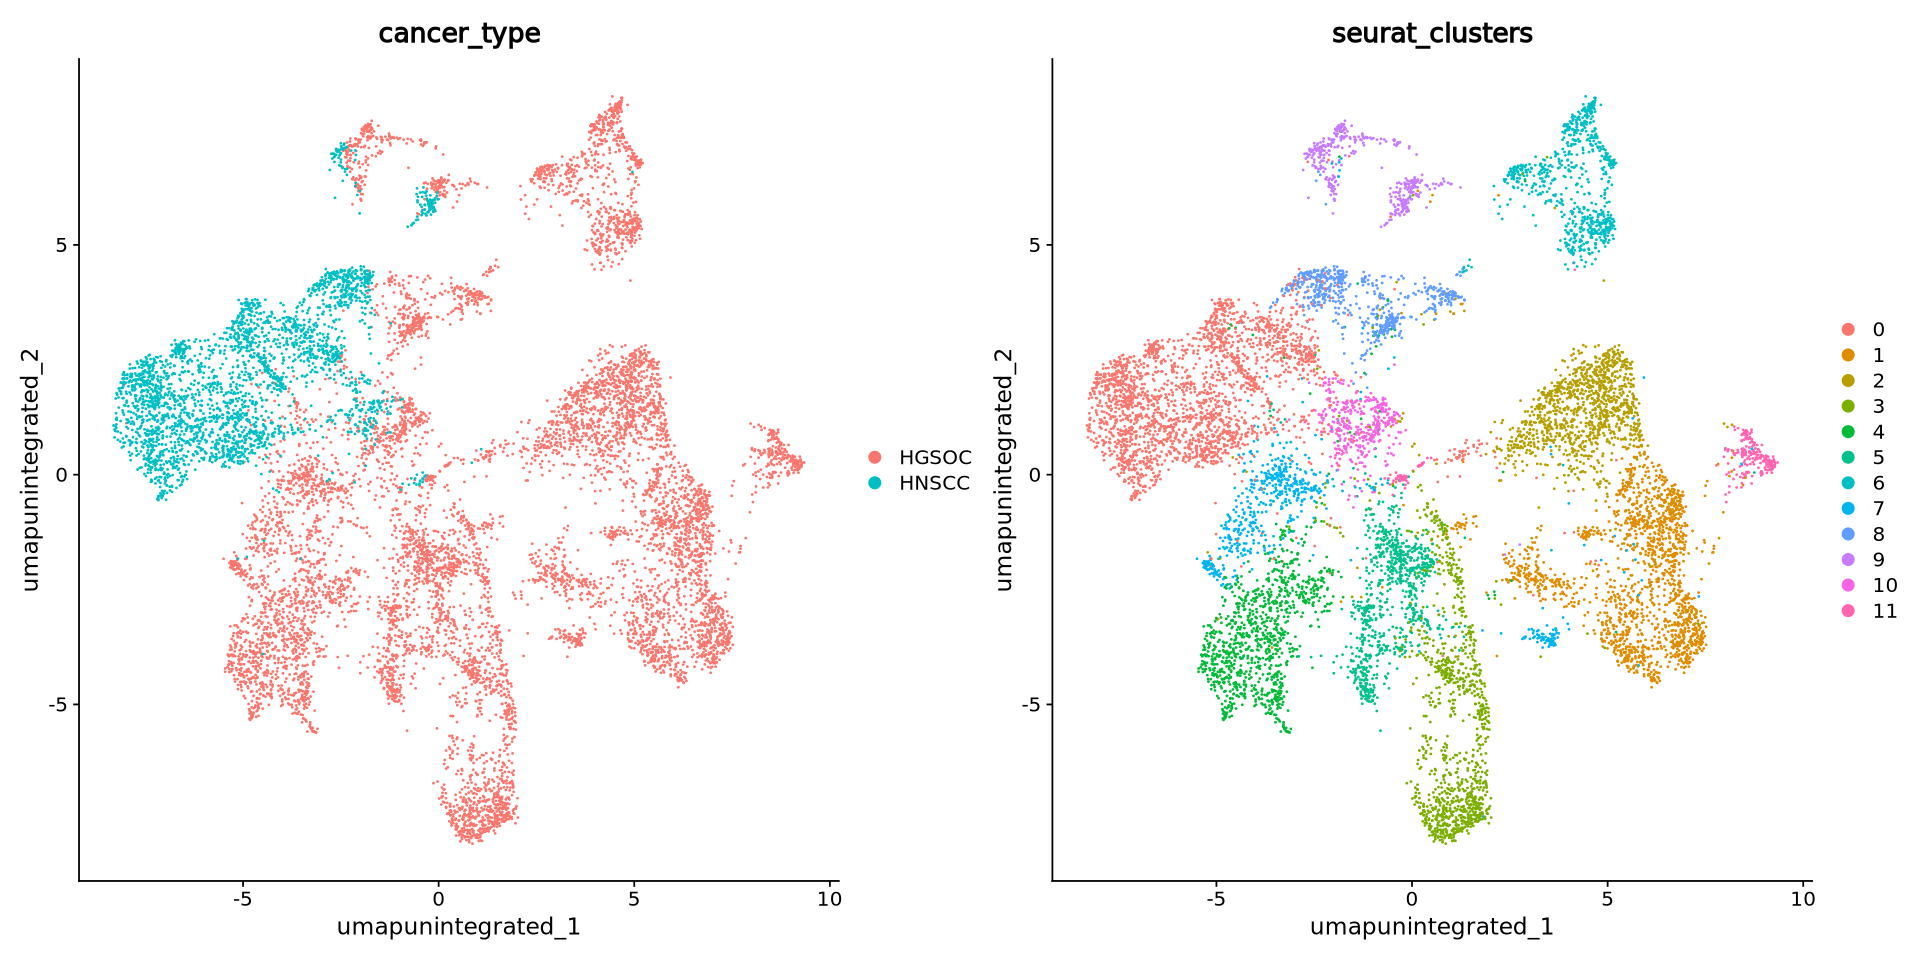

In [19]:
#options(repr.plot.height=8, repr.plot.width=16)
#DimPlot(Data, reduction = "umap.unintegrated", group.by = c("cancer_type", "seurat_clusters"))

In [22]:
Data

An object of class Seurat 
41720 features across 11261 samples within 1 assay 
Active assay: RNA (41720 features, 2000 variable features)
 33 layers present: counts.1.GSE217517, counts.1.GSE188737, counts.2.GSE217517, counts.2.GSE188737, counts.3.GSE217517, counts.3.GSE188737, counts.4.GSE217517, counts.4.GSE188737, counts.5.GSE217517, counts.5.GSE188737, counts.6.GSE217517, counts.6.GSE188737, counts.7.GSE217517, counts.7.GSE188737, counts.8.GSE217517, data.1.GSE217517, data.2.GSE217517, data.3.GSE217517, data.4.GSE217517, data.5.GSE217517, data.6.GSE217517, data.7.GSE217517, data.8.GSE217517, scale.data.GSE217517, data.1.GSE188737, data.2.GSE188737, data.3.GSE188737, data.4.GSE188737, data.5.GSE188737, data.6.GSE188737, data.7.GSE188737, scale.data.GSE188737, scale.data
 2 dimensional reductions calculated: pca, umap.unintegrated

In [37]:
Data <- RunUMAP(Data, dims = 1:30, reduction = "pca", reduction.name = "umap.unintegrated", verbose = FALSE)

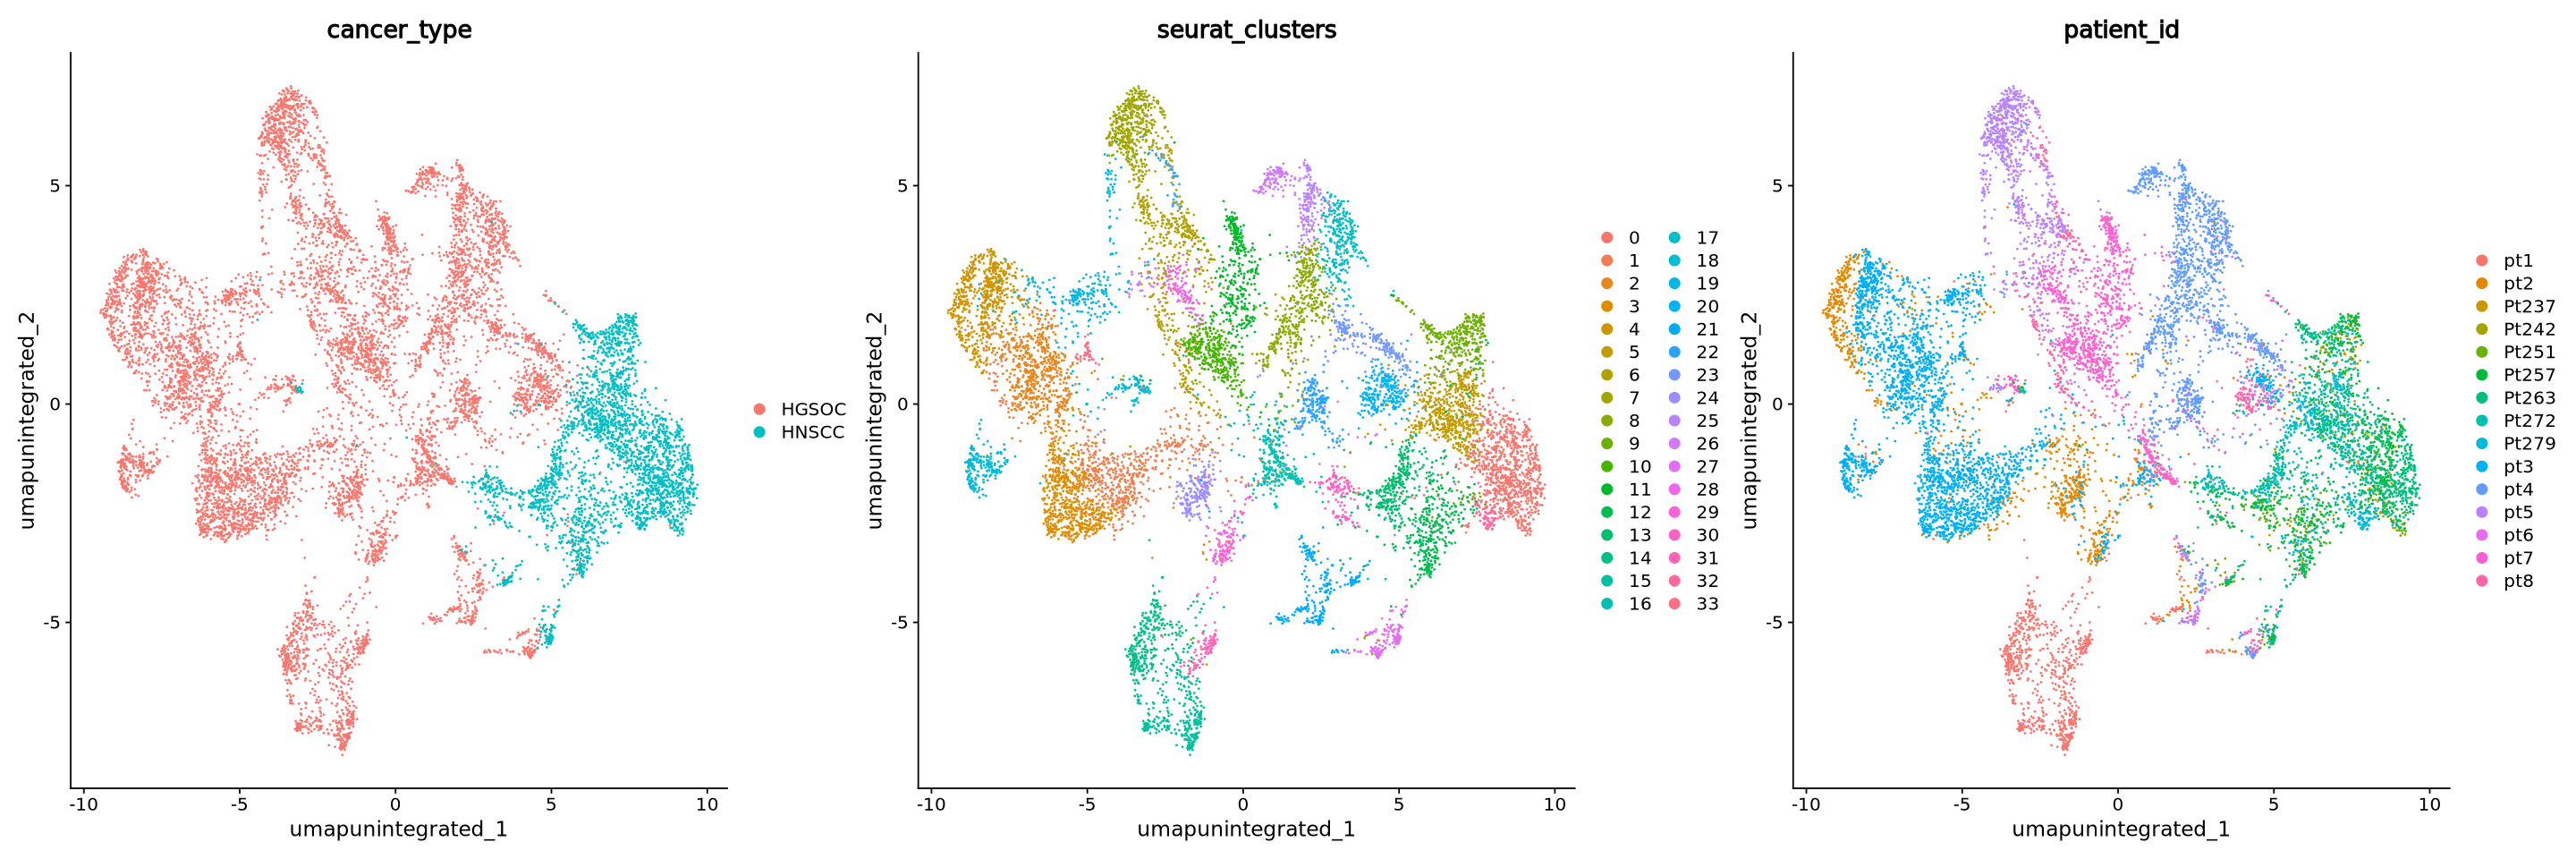

In [44]:
options(repr.plot.height=8, repr.plot.width=24)
DimPlot(Data, reduction = "umap.unintegrated", group.by = c("cancer_type", "seurat_clusters","patient_id"))

#### can see that they are clustering by dataset, now let's try integration

In [36]:
Data <- IntegrateLayers(object = Data, method = CCAIntegration, orig.reduction = "pca", new.reduction = "integrated.cca", verbose = FALSE)

Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard

ERROR: Error: k.weight (100) is set larger than the number of cells in the smallest object (37). Please choose a smaller k.weight.


In [43]:
table(Data$sample_id)


GSE188737_HNSCC_237_Primary GSE188737_HNSCC_242_Primary 
                         77                         105 
GSE188737_HNSCC_251_Primary GSE188737_HNSCC_257_Primary 
                        219                         738 
GSE188737_HNSCC_263_Primary GSE188737_HNSCC_272_Primary 
                        915                         382 
GSE188737_HNSCC_279_Primary         GSE217517_HGSOC_pt1 
                        368                         842 
        GSE217517_HGSOC_pt2         GSE217517_HGSOC_pt3 
                        966                        2678 
        GSE217517_HGSOC_pt4         GSE217517_HGSOC_pt5 
                       1517                        1004 
        GSE217517_HGSOC_pt6         GSE217517_HGSOC_pt7 
                         37                        1054 
        GSE217517_HGSOC_pt8 
                        359 

### therefore, the problem is too few myeloid cells in some of the patients (37 in HGSOC pt 6)

In [46]:
#try join layers of patients before mergig datasets
OCj <- JoinLayers(OC)
HN2j <- JoinLayers(HN2)

In [47]:
OC
OCj
HN2
HN2j

An object of class Seurat 
36601 features across 8457 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
36601 features across 8457 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
23148 features across 2804 samples within 1 assay 
Active assay: RNA (23148 features, 2000 variable features)
 15 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, data.1, data.2, data.3, data.4, data.5, data.6, data.7, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
23148 features across 2804 samples within 1 assay 
Active assay: RNA (23148 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 2 dimensional reductions calculated: pca, umap

In [49]:
Dataj <- merge(OCj, y = HN2j, project = "merged")

In [51]:
Dataj <- NormalizeData(Dataj)
Dataj <- FindVariableFeatures(Dataj)
Dataj <- ScaleData(Dataj)
Dataj <- RunPCA(Dataj)

Normalizing layer: counts.GSE217517

Normalizing layer: counts.GSE188737

Finding variable features for layer counts.GSE217517

Finding variable features for layer counts.GSE188737

Centering and scaling data matrix

PC_ 1 
Positive:  FBXL7, PARD3, IRAK2, DENND4A, RBMS3, ZFPM2, EIF2AK3, MEG3, TEX14, TSHZ2 
	   PSD3, AUTS2, NR2F2-AS1, NAV3, MIR99AHG, GPR132, CASC15, FOXO1, SOX5, CDH11 
	   RORA, LDLRAD4, MAP4K4, MAGI2, EXT1, IMMP2L, PLCB1, ITGB8, CROCC, YAP1 
Negative:  PRDX1, FTL, CTSZ, C1QC, CTSC, CST3, HSP90AA1, HSPA1A, TUBA1B, C1QB 
	   CTSB, CD68, H2AFZ, DNAJB1, CALR, ACP5, GLUL, TUBB, HLA-DQB1, IFI6 
	   IFITM1, C1QA, CSTB, APOC1, CXCL10, RAN, CTSD, FTH1, IFI27, GBP1 
PC_ 2 
Positive:  EREG, FCN1, EHD1, THBS1, AQP9, S100A9, S100A8, CXCL8, VCAN, S100A12 
	   PTGS2, CD300E, FCAR, SMAD3, ECE1, NLRP3, MAP4K4, TNIP1, SERPINB2, IRAK2 
	   IL1R1, CFP, APOBEC3A, PLCB1, F3, BCL2A1, STAT4, TJP2, GPR132, ADORA2A 
Negative:  C1QC, APOE, C1QB, C1QA, STMN1, APOC1, PRDX1, RNASE1, TUBB, SPP1 
	  

In [52]:
Dataj <- FindNeighbors(Dataj, dims = 1:30, reduction = "pca")
Dataj <- FindClusters(Dataj, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11261
Number of edges: 398744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8375
Number of communities: 35
Elapsed time: 1 seconds


In [53]:
Dataj <- RunUMAP(Dataj, dims = 1:30, reduction = "pca", reduction.name = "umap.unintegrated", verbose = FALSE)

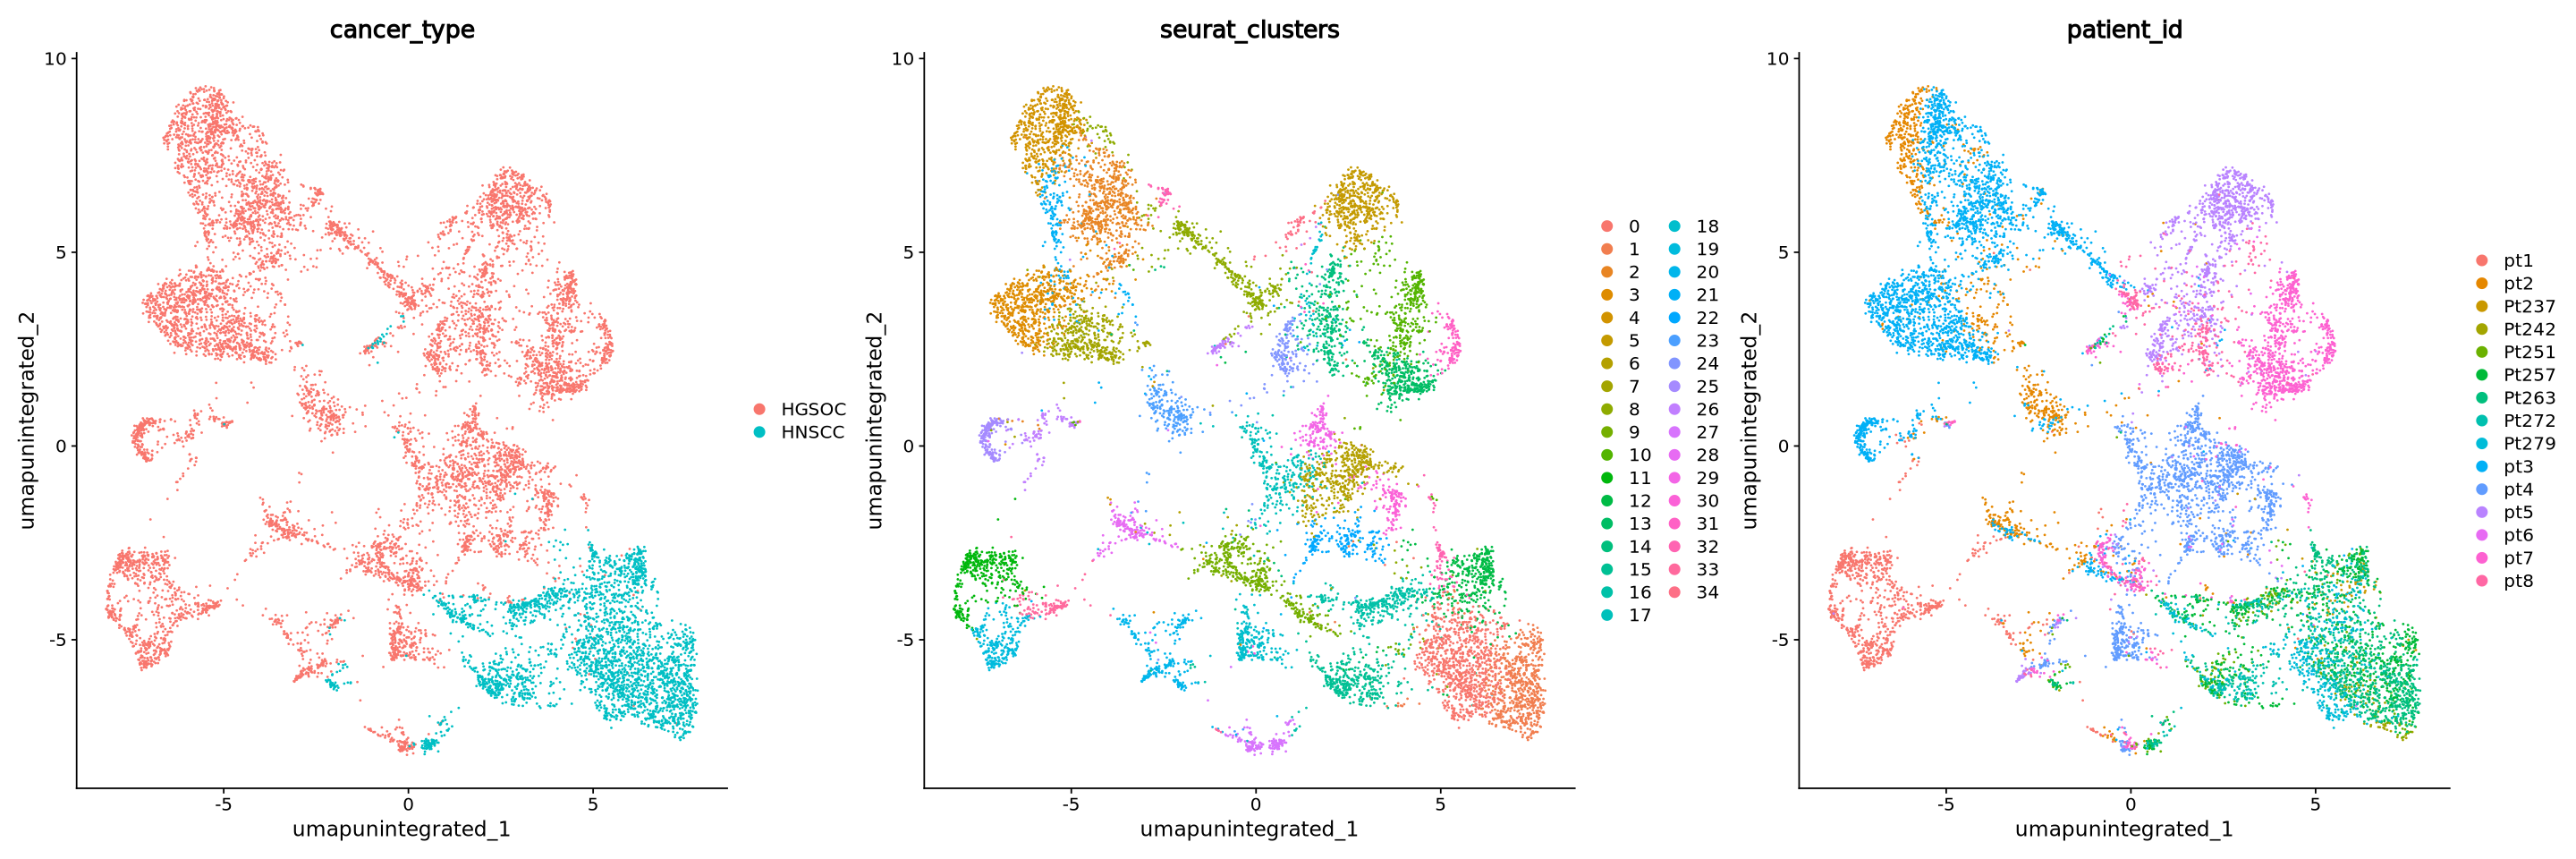

In [54]:
options(repr.plot.height=8, repr.plot.width=24)
DimPlot(Dataj, reduction = "umap.unintegrated", group.by = c("cancer_type", "seurat_clusters","patient_id"))

In [55]:
Dataj <- IntegrateLayers(object = Dataj, method = CCAIntegration, orig.reduction = "pca", new.reduction = "integrated.cca", verbose = FALSE)

In [56]:
# re-join layers after integration
Dataj[["RNA"]] <- JoinLayers(Dataj[["RNA"]])

In [57]:
Dataj <- FindNeighbors(Dataj, reduction = "integrated.cca", dims = 1:30)
Dataj <- FindClusters(Dataj, resolution = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11261
Number of edges: 407732

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8596
Number of communities: 23
Elapsed time: 1 seconds


In [58]:
Dataj <- RunUMAP(Dataj, dims = 1:30, reduction = "integrated.cca")

12:05:52 UMAP embedding parameters a = 0.9922 b = 1.112

12:05:52 Read 11261 rows and found 30 numeric columns

12:05:52 Using Annoy for neighbor search, n_neighbors = 30

12:05:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:05:52 Writing NN index file to temp file /scratch/temp/9871339/RtmpeOuPct/file4fbf17a9a129

12:05:52 Searching Annoy index using 1 thread, search_k = 3000

12:05:55 Annoy recall = 100%

12:05:55 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:05:56 Initializing from normalized Laplacian + noise (using RSpectra)

12:05:56 Commencing optimization for 200 epochs, with 481880 positive edges

12:06:01 Optimization finished



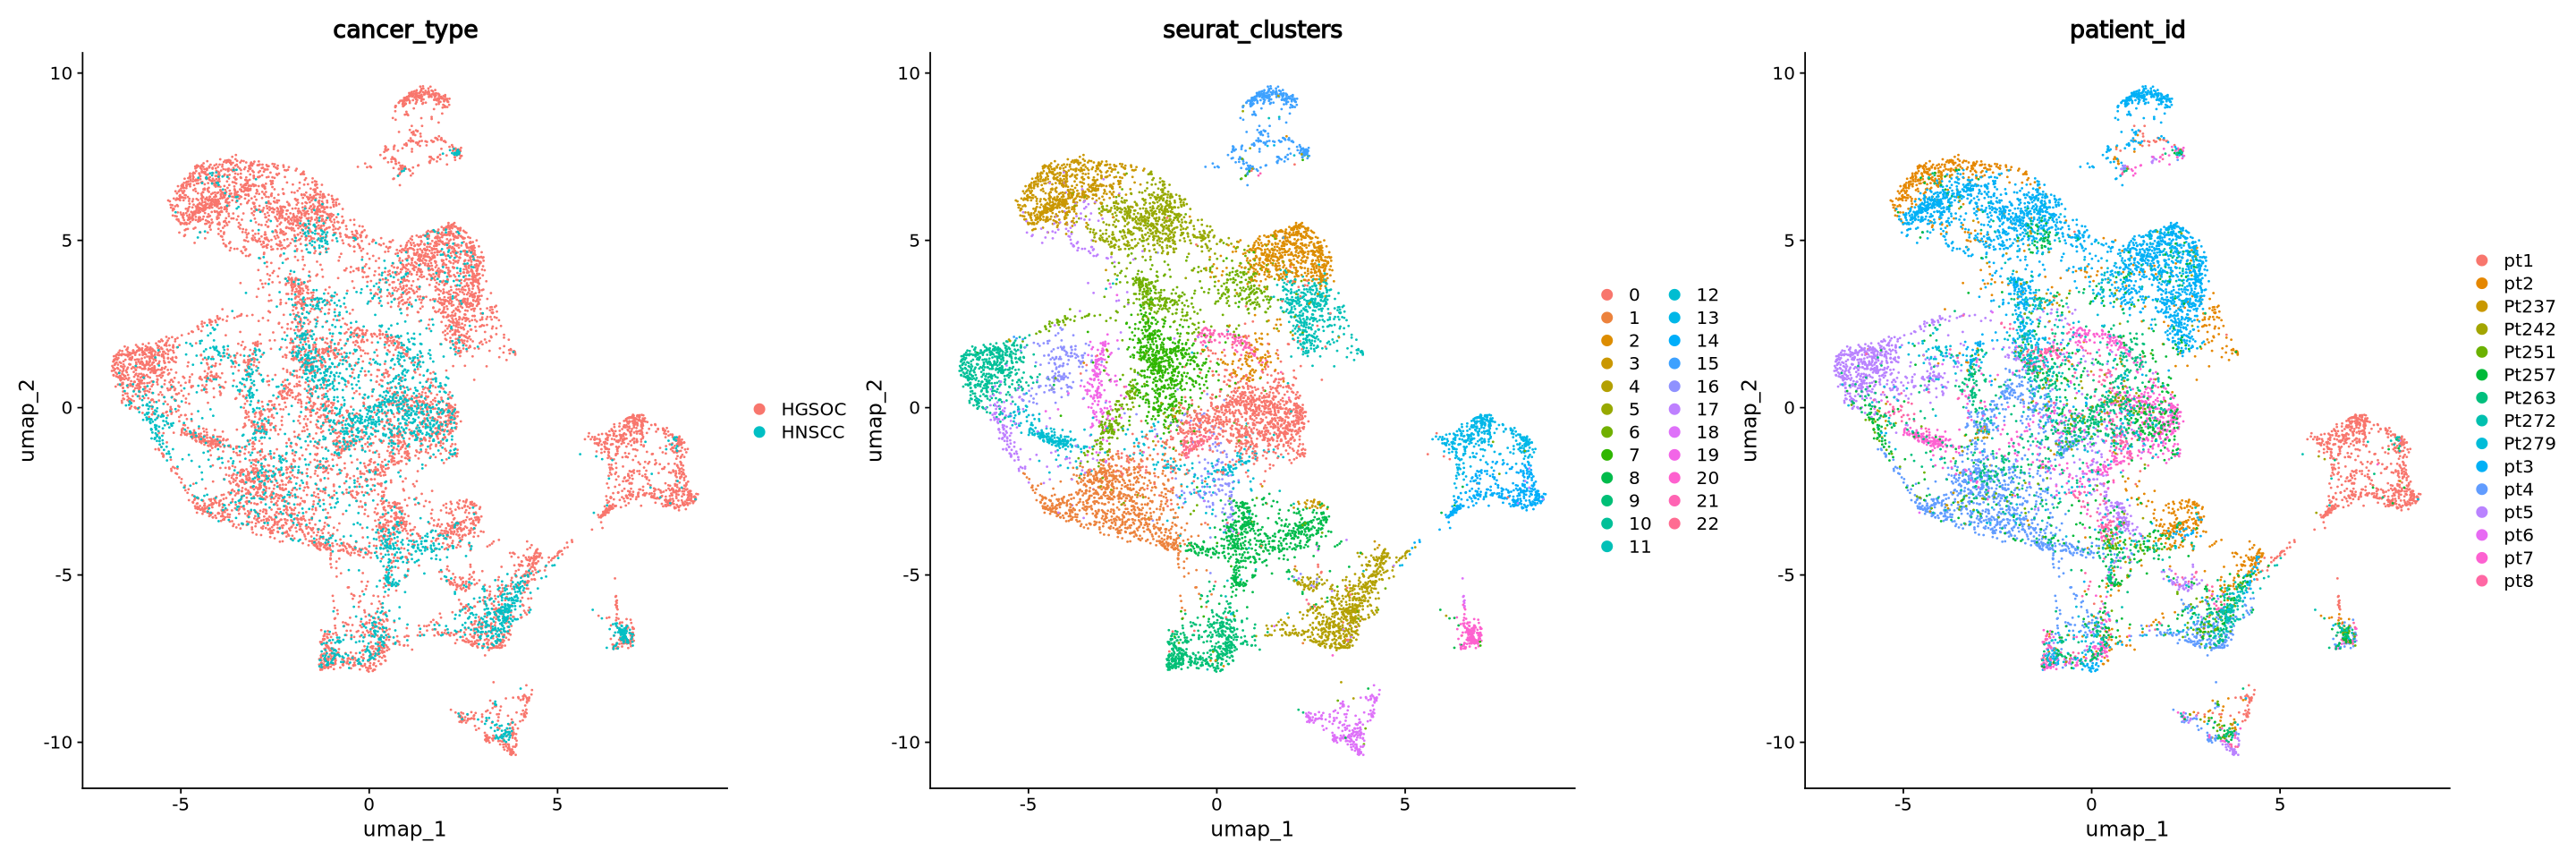

In [60]:
DimPlot(Dataj, reduction = "umap", group.by = c("cancer_type", "seurat_clusters","patient_id"))